# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
import matplotlib.figure
init_printing()
#from math import *
from interval import interval
from interval import imath as im
import sys
from pprint import pprint


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

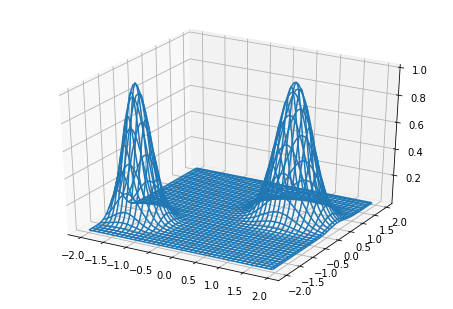

In [2]:
def activate_func(x):
    """
    params:
        x = np.array([x_1, x_2])
    """
    return np.exp(-4*((x[0]-1)**2) - 6*((x[1]-0.5)**2)) + \
        np.exp(-7*((x[0]+1.5)**2) - 9*((x[1]+1)**2))
    
# x = np.arange(-1.6, -1.35, 0.004) 
# y = np.arange(-1.16, -0.9, 0.004) 

x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 

X, Y = np.meshgrid(x, y)
Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

### Krawczyk method

In [3]:
! echo '' > find_all_solution.out
from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk

In [4]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_x_1 = symbols("f_x_1", cls=Function)
f_x_2 = symbols("f_x_2", cls=Function)
nn = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
func_eval = lambda func: (lambda x_1, x_2, exp=im.exp: eval(str(func)))
f = fmat([[func_eval(nn)]])
f_grad_symbol = [[nn.diff(x_1)],[nn.diff(x_2)]]
f_grad = fmat([[func_eval(nn.diff(x_1))], [func_eval(nn.diff(x_2))]])
hes = hessian(nn, (x_1,x_2))
f_grad_grad = fmat([[None for i in range(hes.shape[1])] for j in range(hes.shape[0])])
for i in range(2):
    for j in range(2):
        f_grad_grad[i][j] = func_eval(hes[i,j])


#### 自動微分 

----nn-----



----nn_grad----


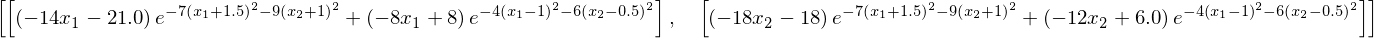


-----nn_hessian-----


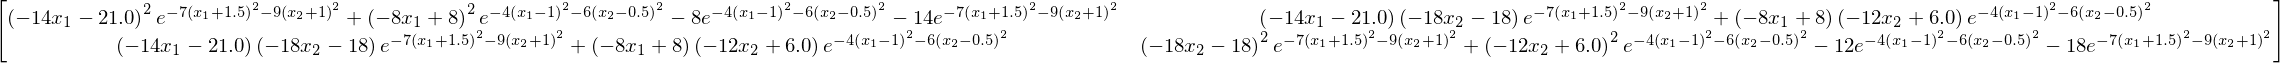

In [5]:
print '----' + 'nn' + '-----'
display(nn)
print
print '----' + 'nn_grad' + '----'
display(f_grad_symbol)
print
print '-----' + 'nn_hessian' + '-----'
display(hes)
print
# print '-----' + 'X' + '-------'
# pprint(X)
# print

#### 全解探索

In [9]:
# x_1 = interval[-2, 2.2]
# x_2 = interval[-2, 2.2]

x_1 = interval[-0.2, 1.6]
x_2 = interval[-0.2, 1.6]

# x_1 = interval[-2, 2]
# x_2 = interval[-2, 2]

X = ip([[x_1],[x_2]])


kra = Krawczyk(f_grad,f_grad_grad,X)

cnt_max = 2000
max_width = 1e-4
boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_all_solution(trace=False, cnt_max=cnt_max, max_width=max_width)
print '#####'*10
pprint(boxes)

Loop end. cnt:14, len(S):0, len(T):1, len(U):0

14
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT -----------
[[[interval([0.9952848190539683, 1.0054980269449856])],
  [interval([0.4953550475921108, 0.5032873328514924])]]]
##################################################
[[[interval([0.9999999999999998, 1.0000000000000002])],
  [interval([0.49999999999999994, 0.5000000000000001])]]]


T_num


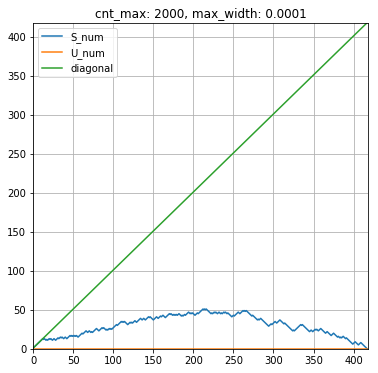

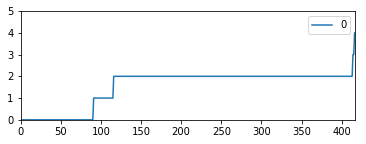

In [7]:
title = 'cnt_max: {}, max_width: {}'.format(cnt_max, max_width)
df = pd.DataFrame([S_num_list, U_num_list, range(1, len(S_num_list)+1)]).T
df.columns = ['S_num', 'U_num', 'diagonal']
df.plot(grid=True, title=title, figsize=(6,6), xlim=(0, len(S_num_list)), ylim=(0, len(S_num_list)))
print 'T_num'
pd.DataFrame(T_num_list).plot(ylim=(0,T_num_list[-1]+1), figsize=(6,2))

## 探索の可視化

In [ ]:
_NO_SOLUTIONS_FLAG = '_NO_SOLUTIONS_FLAG'
_EXACT_1_SOLUTION_FLAG = '_EXACT_1_SOLUTION_FLAG'
_MULTI_SOLUTIONS_FLAG = '_MULTI_SOLUTIONS_FLAG'  # less than 1 solution
_UNCLEAR_SOLUTION_FLAG = '_UNCLEAR_SOLUTION_FLAG'

# facecolor, edgecolor
color_map ={
    _NO_SOLUTIONS_FLAG: ("#777777", "#000000"),
    _UNCLEAR_SOLUTION_FLAG:("#ffffff", "#000000" ),
    _EXACT_1_SOLUTION_FLAG: ("#00ffff", "#00ffff"),
}

def get_rect(x_1, x_2, facecolor_code, edgecolor_code):
    left, right, below, above = x_1[0][0], x_1[0][1], x_2[0][0], x_2[0][1]
    rect = Rectangle((left, below),
                    right - left,
                    above - below,
                    facecolor= facecolor_code,
                    edgecolor=edgecolor_code
                    )
    return rect


print 'len(animation_box): {}'.format(len(animation_box))
x1_lim = animation_box[0][0][0][0][0][0]
x2_lim = animation_box[0][0][0][1][0][0]
print x1_lim
print x2_lim

In [ ]:
x = np.arange(-2, 2.5, 0.01) 
y = np.arange(-2, 2.5, 0.01) 
X, Y = np.meshgrid(x, y)
Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()])).reshape(X.shape)


for i in range(len(animation_box)):
    if i % 10:
        continue
        
    fig = plt.figure(figsize=(8,8))
    plt.xlim(x1_lim)
    plt.ylim(x2_lim)
    ax = fig.add_subplot(111)
    for j in range(i):
        for parent_box, parent_flag in animation_box[j]:
#        parent_box, parent_flag = animation_box[j]
            fcolor, ecolor = color_map[parent_flag]# facecolor, edgecolor
            parent_x1 = parent_box[0][0]
            parent_x2 = parent_box[1][0]
            if ip.is_empty(parent_box):
                continue
            rect = get_rect(parent_x1, parent_x2, fcolor, ecolor)
            ax.add_patch(rect)
        
    # 最後にcolor mapを薄く重ねる    
    im =plt.pcolormesh(X, Y, Z, alpha=0.1, zorder=1000, shading='gouraud', cmap=plt.cm.Reds)
    #fig.colorbar(im)
    #plt.show()
    fig.savefig("image/anime_{0:0>4}.png".format(i))
    plt.close(fig)
    
print 'finish'